In [ ]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

In [ ]:
df = pd.read_csv('NYC_Restaurants.csv', dtype = unicode)

# Q1 Create a new column called RESTAURANT

I concatenated 'DBA','BUILDING','STREET' and 'ZIPCODE' columns to for the new 'RESTAURANT' column.

In [152]:
df['RESTAURANT']=df['DBA']+" "+df['BUILDING']+" "+df['STREET']+" "+df['ZIPCODE']
df['RESTAURANT'][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# Q2 Count the number of restaurants

I used the unique function to get counts of restaurants with unique addresses, and got the number of unique restaurants by length output.

In [153]:
counts=df['RESTAURANT'].unique()
print "The number of restaurants in the data is", len(counts)

The number of restaurants in the data is 10114


# Q3  How many chains are there

1)I first took out duplicate records of same restaurants from the original dataset and formed a new set called df2.
2)I counted the number of different brands and filtered out chains.
3)Got the number of chains by taking its length.

In [156]:
#take out duplicate records of restaurants
df2=df.ix[df['RESTAURANT'].drop_duplicates().index]

#Count the number of different brands
DBACount=df2["DBA"].value_counts()
#filter out chains
chains=DBACount[DBACount.values>1]
print "The number of chain is", len(chains)

The number of chain is 368


# Q4 Plot a graph of top 20 most popular chains

I took the top 20 chains from Q3 results and plotted the graph.

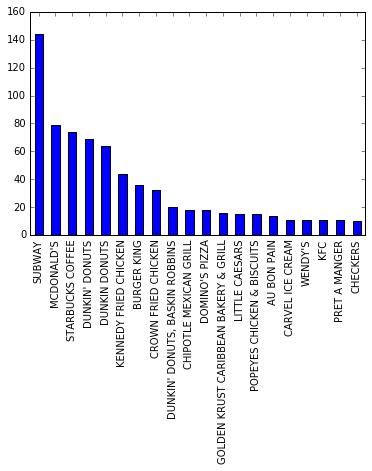

In [158]:
top_20=chains[:20]
top_20.plot(kind='bar')

# Q5 What fraction of all restaurants are chains?

I took the sum of chains, which yields to the total number of chain restaurants under every chain brand. While len(counts) represents the number of all restaurants.

In [159]:
#chains=DBACount[DBACount.values>1]
fraction_of_chains=chains.sum()/float(len(counts))
print fraction_of_chains," of all resturants are chains."

0.164722167293  of all resturants are chains.


# Q6 Plot the number of non-chain restaurants in each boro

I first filtered out non-chain restaurants by adding a if-non-chain function and applied the function to DBA using map. Then I deleted the 'Missing'from BORO and counted the number of non-chain restaurants in each non 'Missing' boro.

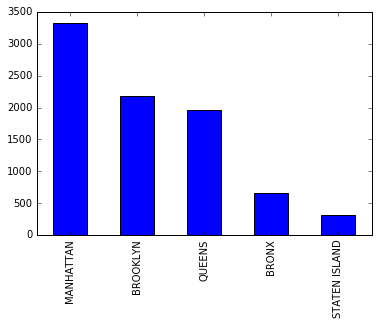

In [162]:
#DBACount=df2["DBA"].value_counts()

non_chain=DBACount[DBACount.values==1]

def if_non_chain(DBA):
    return DBA in non_chain
#filter out non_chain restaurants   
mask1=df2['DBA'].map(if_non_chain)
a=df2[mask1]
#Delete boro values of 'Missing'
mask2=(a['BORO']!='Missing')
non_chain_boro=a[mask2]
#Do value counts and plot the number of non-chain restaurants in each non 'Missing' boro
non_chain_boro['BORO'].value_counts().plot(kind='bar')


# Q7 Plot the fraction of non-chain restaurants in each boro

I got the number of non-chain resaurants from Q6. Also, I deleted 'Missing' values from 'boro' column and got the number of all restaurants in each boro by value counts.

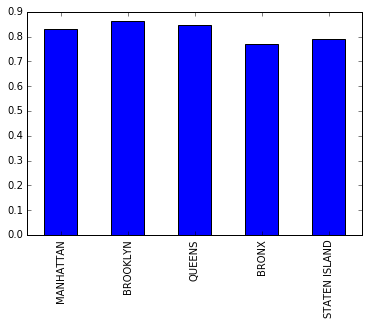

In [163]:
#number of non-chain restaurants in each boro
c=non_chain_boro['BORO'].value_counts()
#number of all restaurants in each boro
all_boro=df2['BORO'][df2['BORO']!='Missing'].value_counts()
fraction=c/all_boro
fraction.plot(kind='bar')

# Q8 Plot the top 20popularity of cuisines

I dropped the duplicate records first. Then counted the number of different cuisines under unique restaurants and plotted the top 20.

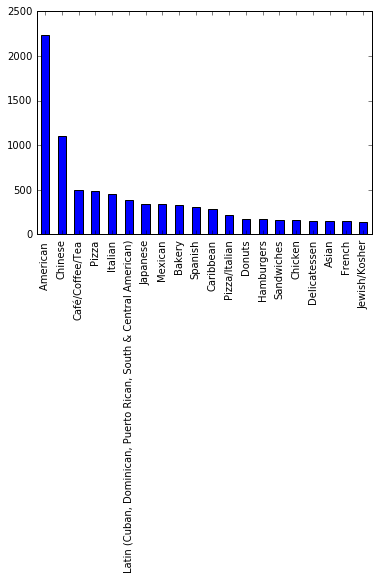

In [164]:
# Drop duplicate records
df3=df.drop_duplicates(subset=["CUISINE DESCRIPTION","RESTAURANT"])
# Count the number of different cuisines
popular_cuisine=df3["CUISINE DESCRIPTION"].value_counts()
#Plot top 20
popular_cuisine[:20].plot(kind="bar")

# Q9 Plot the cuisines among restaurants which never got cited for violations

I established a mask to filter out cuisines that never got cited and applied it to the cuisines. From that point, I got clean cuisines. 
By taking value counts, I got the number of each clean cuisine and plotted the top20.

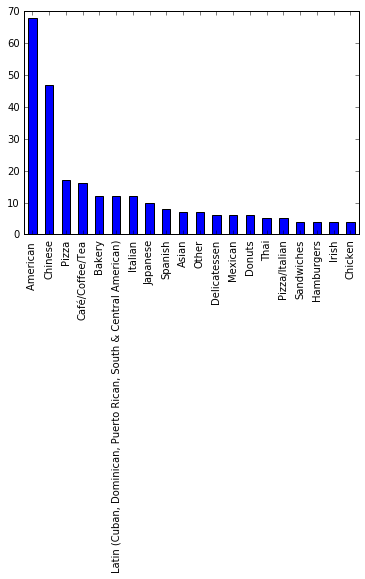

In [128]:
# take out duplicate records of restaurants
df2=df.ix[df['RESTAURANT'].drop_duplicates().index]
# Establish a mask to filter out cuisines that never got cited
mask_no_violations=df2['VIOLATION CODE'].isnull()
clean_cuisine=df2['CUISINE DESCRIPTION']
clean=clean_cuisine[mask_no_violations]
#take out top20
cl = clean.value_counts()[:20]
cl.plot(kind='bar')


# Q10 what cuisines tend to be the 'cleanest'

First, I made a mask to filter out cuisines for which there were at least 20 restaurants representing. Then I used the Q9 results devided by numbers of cuisines that have at least 20 representitive restaurants.
Also, I dropped NA values and sorted it.

In [167]:
# Select all cuisines for which there were at least 20 restaurants representing that cuisine.
cuisine_counts=df2['CUISINE DESCRIPTION'].value_counts()
cuisine_twenty=cuisine_counts[cuisine_counts>=20] 

#compute the ratio by dividing inspection past cuisines over the total number of rows for that cuisine.
cleanest_ratio=(cl/cuisine_twenty).dropna().sort_values(ascending=False)[:10]
print cleanest_ratio

Other              0.067961
Irish              0.057143
Asian              0.047945
Chinese            0.042805
Delicatessen       0.039216
Thai               0.039062
Bakery             0.036810
Pizza              0.035270
Donuts             0.034091
Café/Coffee/Tea    0.032129
Name: CUISINE DESCRIPTION, dtype: float64


# Q11 What are the most common violations in each borough

I used the crosstab function to create a table of numbers of times each violation description was ovserved in each borough. Then I deleted the 'Missing' values for boro and got the most common violations in each borough.

In [168]:
d=pd.crosstab((df['VIOLATION DESCRIPTION'] ),df['BORO'])
del d['Missing']
print d.idxmax()


BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


# Q12 What are the most common violations per borough

I calculated the overall frequencies using numbers of each type of violations and the total number of violations. After that, I did normalization for each borough. Finally I transposed it back and got the most common violations per borough.

In [170]:
# Count each type of violations
violation_counts=df['VIOLATION DESCRIPTION'].value_counts()
# Get total number of violations
all_violations=sum(violation_counts)
#Calculate overall frequencies
violation_frequency=violation_counts/all_violations
#Normalization
#d=pd.crosstab((df['VIOLATION DESCRIPTION'] ),df['BORO'])
#del d['Missing']
normalization=(d.T)/violation_frequency
#Transpose back in order to conduct idxmax function
normalization_violation=normalization.T

print normalization_violation.idxmax()


BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object


# Q13 How many phone area codes correspond to a single zipcode

In [172]:
#Extract the first 3 charaters of phone number
#Add a column using the area code
df['area_code']=len(df)*[None]
for n in range(len(df)):
    df['area_code'][n]=df['PHONE'][n][:3]
#take out zipcode and area_code column and dropped the duplicate rows
zip_area=df[['ZIPCODE','area_code']]
zip_area_unique=zip_area.drop_duplicates()
#count the number of each area code
area_counts=zip_area_unique['area_code'].value_counts()
#Select areacodes with one zipcode
area_code_unique=area_counts[area_counts==1]
#print the number
print len(area_code_unique)

34


# Q14 Find common misspellings of street names

A new table was created using the three new columns. I merged the table with itself after removing duplicates and empty street base. I then used cross-tabulation table to find the most commonly street type that occurs with each of the following:AVE, ST, RD, PL, BOULEARD, BULEVARD.

In [174]:
# Create street type column
df['street_type']=len(df)*[None]
for n in range(len(df)):
    df['street_type'][n]=df['STREET'][n].split()[-1]
# Create street base column
df['street_base']=len(df)*[None]
for n in range(len(df)):
    df['street_base'][n]=' '.join(df['STREET'][n].split()[:-1])
# Create combined column   
df['street_base_zip']=df['street_base']+" "+df['ZIPCODE']

# Create a table containnning the above three columns
df_new=df[['street_type','street_base','street_base_zip']]
# Remove duplicates
df_new=df_new.drop_duplicates()
#Remove instances where street base is empty
df_new=df_new[df_new['street_base']<>'']

# Merge with itself
df_new_merge=pd.merge(df_new,df_new, left_on=['street_base_zip'], right_on=['street_base_zip'])
# Select the rows where street types are different
different_address=df_new_merge[df_new_merge['street_type_x'] <> df_new_merge['street_type_y']]

# Cross-tabulation
difference_counts = pd.crosstab(different_address['street_type_x'], different_address['street_type_y'])

#find the most common street types for each of the requested street types
print difference_counts[['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']].idxmax()



street_type_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object
